<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/DL_AutoEncoder_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:10<00:00, 904kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.08MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.53MB/s]


In [ ]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32))

        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh())

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder().to(device)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train_losses = []

In [ ]:
for epoch in range(num_epochs):
    total_loss = 0
    for images, _ in train_loader:
        images = images.to(device)
        reconstructed = model(images)

        loss = criterion(reconstructed, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.1448
Epoch [2/10], Loss: 0.0760
Epoch [3/10], Loss: 0.0628
Epoch [4/10], Loss: 0.0560
Epoch [5/10], Loss: 0.0506
Epoch [6/10], Loss: 0.0465
Epoch [7/10], Loss: 0.0437
Epoch [8/10], Loss: 0.0415
Epoch [9/10], Loss: 0.0396
Epoch [10/10], Loss: 0.0376


In [ ]:
def visualize_reconstructions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, _ = next(iter(test_loader))
        images = images.to(device)
        reconstructed = model(images)

    fig, axes = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(10):
        axes[0, i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[1, i].imshow(reconstructed[i].cpu().squeeze(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].axis('off')

    plt.show()

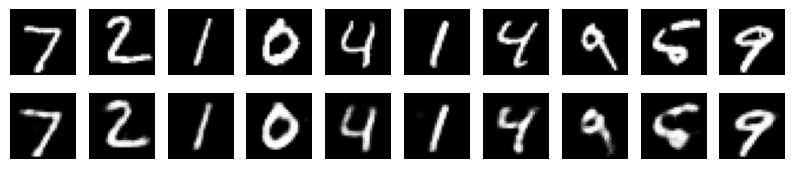

In [ ]:
visualize_reconstructions(model, test_loader)

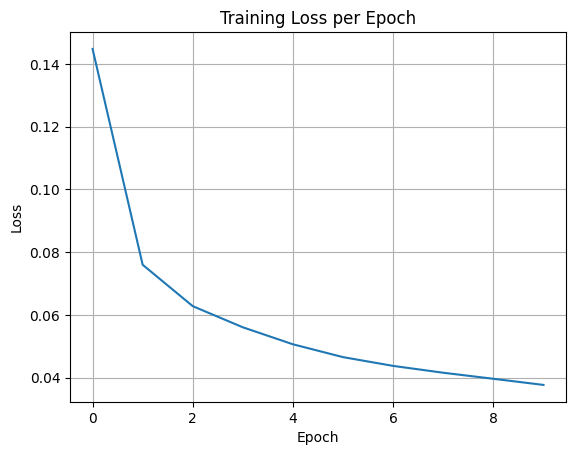

In [ ]:
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss per Epoch")
plt.grid()
plt.show()

**Question:**

How does the dimensionality of the latent space affect the quality of
reconstructed images and the ability of the autoencoder to learn meaningful
representations?

Can reducing it too much lead to information loss, and how can
this be measured?

**Ans:**

The dimensionality of the latent space (the encoded representation of input images) significantly affects both the quality of reconstructed images and the ability of the autoencoder to learn meaningful representations.

### **1. Effect on Reconstruction Quality**
- **Higher-Dimensional Latent Space (e.g., 64, 128, 256)**
  - Preserves more information.
  - Leads to higher-quality reconstructions.
  - Less lossy compression but may capture unnecessary details (overfitting).
  
- **Lower-Dimensional Latent Space (e.g., 2, 4, 8)**
  - Forces the model to learn a more compact and abstract representation.
  - Can lead to blurring or loss of fine details in reconstructed images.
  - Too much reduction leads to severe information loss, making images unrecognizable.

### **2. Learning Meaningful Representations**
- A well-chosen latent space allows the autoencoder to capture key features of the input data, enabling it to generalize well to unseen data.
- A very small latent space may strip away crucial features, making it difficult for the decoder to reconstruct meaningful images.

### **3. Measuring Information Loss**
Several methods can measure information loss when reducing the latent space:
#### **(a) Reconstruction Loss**
- The most direct way to measure information loss.
- A higher Mean Squared Error (MSE) or Binary Cross-Entropy (BCE) loss indicates more reconstruction errors.

#### **(b) Structural Similarity Index (SSIM)**
- SSIM measures perceptual similarity between original and reconstructed images.
- Values close to 1 indicate high similarity, while lower values indicate poor reconstructions.

#### **(c) Latent Space Visualization**
- For very low-dimensional latent spaces (e.g., 2D or 3D), the encoded representations can be visualized using scatter plots.
- If meaningful clusters emerge (e.g., digits in MNIST), the representation is still useful.

#### **(d) Downstream Tasks**
- If the latent representation is used for classification or clustering, its performance on these tasks can indicate how much useful information is retained.

### **4. Trade-off Considerations**
- If the goal is **efficient compression**, a smaller latent space may be preferred.
- If the goal is **high-fidelity reconstruction**, a larger latent space is better.
- If the goal is **feature learning for another task**, a balance is needed to retain useful features while reducing redundancy.

Would you like an experiment to visualize how reconstruction degrades as we reduce the latent space? 🚀